<div>
<img src="https://www.nebrija.com/images/logos/logotipo-universidad-nebrija.jpg" width="200">
</div>

**MODELOS DE PROGRAMACION: MODELO ADIABATICO** -
Prof: Carmen Pellicer Lostao

# FIRST OCEAN EXAMPLE: VERTEX COVER

Many different real-world problems can be formulated as instances of classified graph problems. Some of these are hard and the best currently known algorithms for solution may not scale well. Quantum computing might provide better solutions. In this example, vertex cover is a hard problem that can be solved on D-Wave systems.

Let’s solve a graph problem in Dwave. It is interesting because Dwave has libraries to formulate graph problems automatically, it formulates the problem as a QM automatically for us.

In particular we will solve the **Minimum Vertex Cover** problem, which can be formulated as a BQM and can be solved in DWAVE QPU with the Quantum **DWaveSampler()**

We can import `dwave` libraries though it is not needed if they are also imported in our virtual environment

In [1]:
import dwave

In [2]:
#import time libs to compare time measurements
import time
time.time()   #time in secs since the epoch (the point where the time starts on all platforms-> January 1, 1970, 00:00:00 UTC (Universal Time Coordinated))

1702138019.315336

## Vertex Cover

Formally, a [vertex cover](https://en.wikipedia.org/wiki/Vertex_cover) V′ of an undirected graph G=(V,E) is a subset of V such that u,v∈E ⇒ u∈V′ or v∈V′, that is to say it is a set of vertices V′ where every edge has at least one endpoint in the vertex cover V′. Such a set is said to cover the edges of V. The upper figure shows two examples of vertex covers, with some vertex cover V′ marked in red.

A minimum vertex cover is a vertex cover of smallest possible size. The vertex cover number T is the size of a minimum vertex cover, i.e. T=|V′|.

Possible applications of this problem:

*   In Telecomm networks for traffic monitoring: placing limited numbers of traffic-monitoring equipment on routers in a telecommunication network.
*   In Public Transport networks for traffic monitoring: placing cameras at crossroads to monitor total traffic with minimum investment.
*   In Computer Network Security or Social Networks: develop strategies to  design optimal strategies for protecting the network against virus or fake news attacks in real-time protecting some strategic nodes in the network.

### Solving on a D-Wave System

The purpose of this example is to help a new user to submit a problem to a D-Wave system using Ocean tools with little configuration or coding.

The Ocean tool `dnx.min_vertex_cover()` internally builds a BQM with lowest values (“ground states”) that correspond to a minimum vertex cover and uses our selected sampler to solve it.

We user two samplers in this tool: 

- the `DWaveSampler()` to find the solution in a D-Wave system (QPU)
- a classical somlber `ExactSolver()` to find the solution in the local CPU.

and compare this methods to solve the problem.

When we use a sampler from Ocean software’s dwave-system to solve on a D-Wave system, in addition to `DWaveSampler()`, we must use `EmbeddingComposite()`, which maps unstructured problems to the graph structure of the selected sampler, a process known as **minor-embedding**: our problem graph must be mapped to the QPU’s numerically indexed qubits.

In this problem we compare execution in CPU and QPU measuring execution time and memory requiered to find a solution.

We also monitor our QPU expending in Leap Dashboard (Direct QPU Total)

None

[0]
Qsolver time= 4.745016574859619
[0]
Exactsolver time= 0.004573345184326172


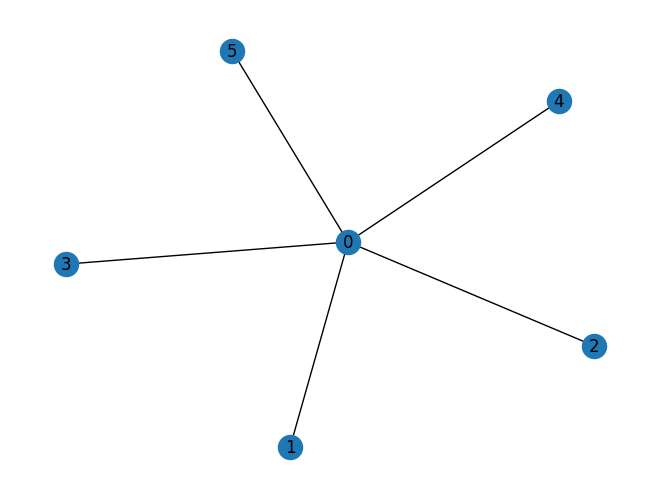

In [3]:
# Importación de Librerias
import networkx as nx
import dwave_networkx as dnx
from dwave.system.samplers import DWaveSampler
from dwave.system.composites import EmbeddingComposite
from dimod.reference.samplers import ExactSolver

# Creación del Grafo de 5 nodos  -> incrementar a 100 y ver que pasa
s5 = nx.star_graph(5)
display(nx.draw(s5,with_labels=True))

# Resolución sobre qpu
t_init=time.time()
sampler = EmbeddingComposite(DWaveSampler())
print(dnx.min_vertex_cover(s5, sampler))
print('Qsolver time=',time.time()-t_init)

# Resolución sobre un Computador Clásico
t_init=time.time()
sampler = ExactSolver()
print(dnx.min_vertex_cover(s5, sampler))
print('Exactsolver time=',time.time()-t_init)


## Additional exercices

Check NetworkX libaries and try other [graph generators](https://networkx.org/documentation/stable/reference/generators.html), such as:

- the `nx.wheel_graph()` with a 5-node wheel graph
- the `nx.circular_ladder_graph()` with a 5-node ladder graph
- the `nx.complete_graph()` with a fully connected graph (clique)

Find the min vertex cover for these graphs with the exact solver and dwave QPU solver

Consider measuring CPU and QPU times and increasing the number of nodes




Comenzamos con el grafo rueda de 5 vértices.

None

[0, 1, 3]
Qsolver time= 4.147996187210083
[0, 1, 3]
Exactsolver time= 0.004525661468505859


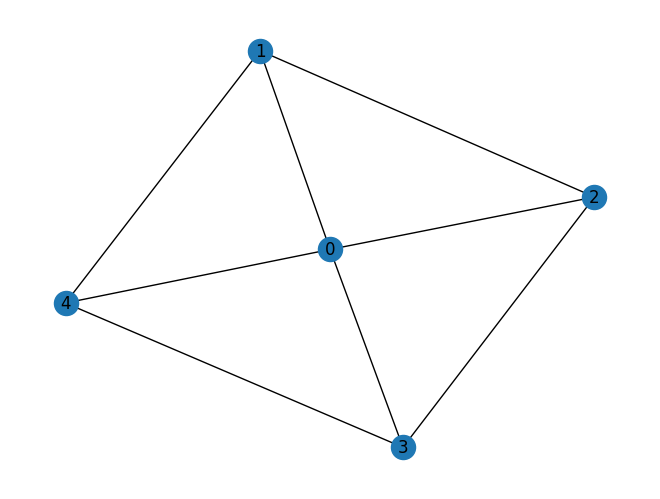

In [4]:
# 5-node wheel graph

# Creación y dibujo del grafo
wheelgraph = nx.wheel_graph(5)
display(nx.draw(wheelgraph,with_labels=True))

# Resolución sobre qpu
t_init=time.time()
sampler = EmbeddingComposite(DWaveSampler())
print(dnx.min_vertex_cover(wheelgraph, sampler))
print('Qsolver time=',time.time()-t_init)

# Resolución sobre un Computador Clásico
t_init=time.time()
sampler = ExactSolver()
print(dnx.min_vertex_cover(wheelgraph, sampler))
print('Exactsolver time=',time.time()-t_init)

Aumentemos el número de vértices a 10.

None

[0, 2, 3, 5, 7, 9]
Qsolver time= 4.194812536239624
[0, 1, 3, 5, 7, 9]
Exactsolver time= 0.005624294281005859


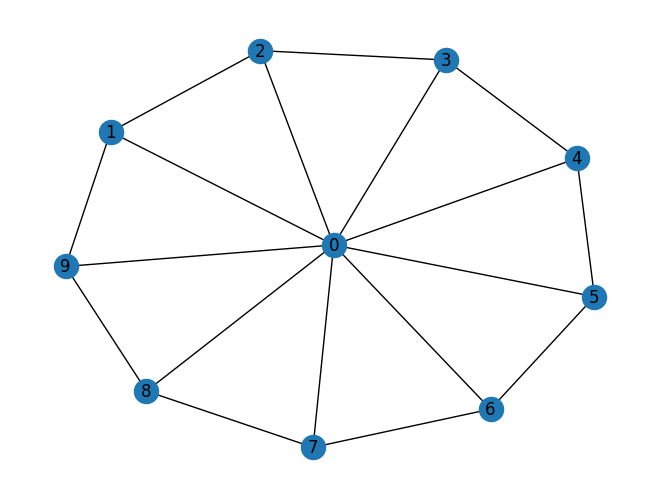

In [5]:
# 10-node wheel graph

# Creación y dibujo del grafo
wheelgraph = nx.wheel_graph(10)
display(nx.draw(wheelgraph,with_labels=True))

# Resolución sobre qpu
t_init=time.time()
sampler = EmbeddingComposite(DWaveSampler())
print(dnx.min_vertex_cover(wheelgraph, sampler))
print('Qsolver time=',time.time()-t_init)

# Resolución sobre un Computador Clásico
t_init=time.time()
sampler = ExactSolver()
print(dnx.min_vertex_cover(wheelgraph, sampler))
print('Exactsolver time=',time.time()-t_init)

A continuación, tratamos el grafo escalera de $2\cdot n = 2\cdot 5 = 10$ vértices.

None

[0, 2, 4, 5, 6, 8]
Qsolver time= 4.213503360748291
[1, 3, 4, 5, 7, 8]
Exactsolver time= 0.0058574676513671875


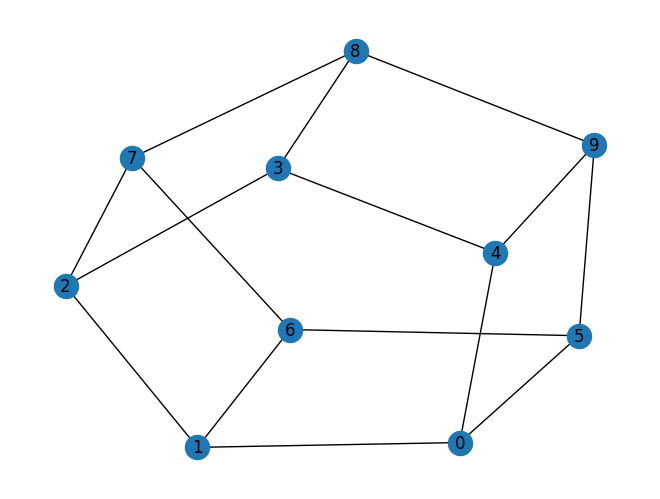

In [6]:
# 5-node ladder graph

# Creación y dibujo del grafo
laddergraph = nx.circular_ladder_graph(5)
display(nx.draw(laddergraph,with_labels=True))

# Resolución sobre qpu
t_init=time.time()
sampler = EmbeddingComposite(DWaveSampler())
print(dnx.min_vertex_cover(laddergraph, sampler))
print('Qsolver time=',time.time()-t_init)

# Resolución sobre un Computador Clásico
t_init=time.time()
sampler = ExactSolver()
print(dnx.min_vertex_cover(laddergraph, sampler))
print('Exactsolver time=',time.time()-t_init)

Consideraremos ahora un número mayor de vértices tomando $n=7$.

None

[0, 1, 3, 5, 7, 9, 11, 13]
Qsolver time= 4.156477928161621
[0, 2, 4, 5, 8, 10, 11, 13]
Exactsolver time= 0.04272031784057617


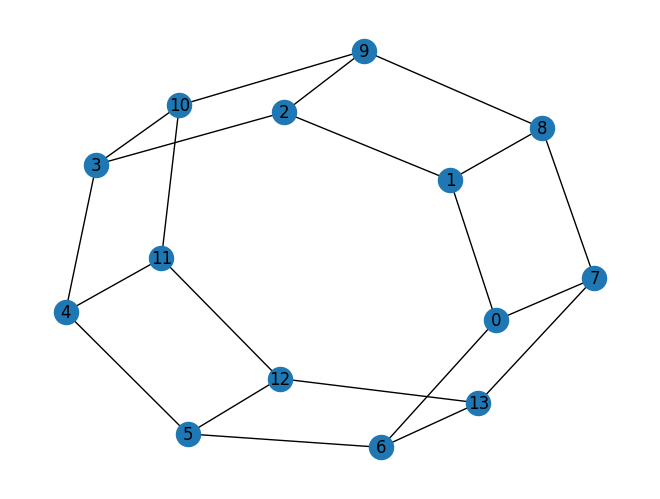

In [7]:
# 7-node ladder graph

# Creación y dibujo del grafo
laddergraph = nx.circular_ladder_graph(7)
display(nx.draw(laddergraph,with_labels=True))

# Resolución sobre qpu
t_init=time.time()
sampler = EmbeddingComposite(DWaveSampler())
print(dnx.min_vertex_cover(laddergraph, sampler))
print('Qsolver time=',time.time()-t_init)

# Resolución sobre un Computador Clásico
t_init=time.time()
sampler = ExactSolver()
print(dnx.min_vertex_cover(laddergraph, sampler))
print('Exactsolver time=',time.time()-t_init)

Finalizamos este ejercicio con el grafo completo $K_5$.

None

[0, 1, 2, 4]
Qsolver time= 4.506876707077026
[0, 1, 2, 4]
Exactsolver time= 0.004762411117553711


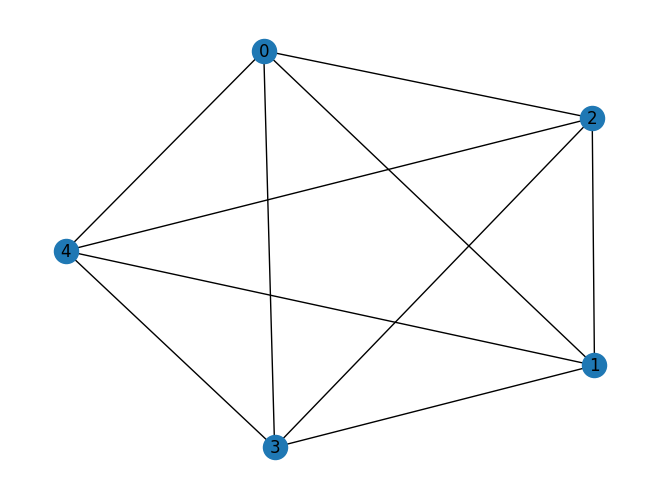

In [8]:
# fully connected graph K_5

# Creación y dibujo del grafo
fcgraph = nx.complete_graph(5)
display(nx.draw(fcgraph,with_labels=True))

# Resolución sobre qpu
t_init=time.time()
sampler = EmbeddingComposite(DWaveSampler())
print(dnx.min_vertex_cover(fcgraph, sampler))
print('Qsolver time=',time.time()-t_init)

# Resolución sobre un Computador Clásico
t_init=time.time()
sampler = ExactSolver()
print(dnx.min_vertex_cover(fcgraph, sampler))
print('Exactsolver time=',time.time()-t_init)

Por último, trataremos $K_{10}$ para ver las diferencias al aumentar el número de nodos.

None

[0, 1, 2, 3, 4, 5, 7, 8, 9]
Qsolver time= 4.890340089797974
[0, 1, 2, 3, 4, 5, 6, 7, 9]
Exactsolver time= 0.0057070255279541016


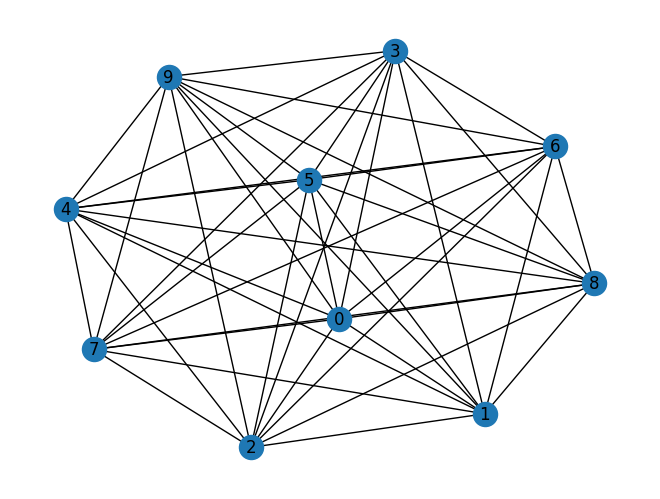

In [9]:
# fully connected graph K_{10}

# Creación y dibujo del grafo
fcgraph = nx.complete_graph(10)
display(nx.draw(fcgraph,with_labels=True))

# Resolución sobre qpu
t_init=time.time()
sampler = EmbeddingComposite(DWaveSampler())
print(dnx.min_vertex_cover(fcgraph, sampler))
print('Qsolver time=',time.time()-t_init)

# Resolución sobre un Computador Clásico
t_init=time.time()
sampler = ExactSolver()
print(dnx.min_vertex_cover(fcgraph, sampler))
print('Exactsolver time=',time.time()-t_init)

Build an arbitrary Graph with NetworkX yand find the **Minimum Vertex Cover**

None

['2', '3', '4']
Qsolver time= 4.048169374465942
['2', '3', '4']
Exactsolver time= 0.004664897918701172


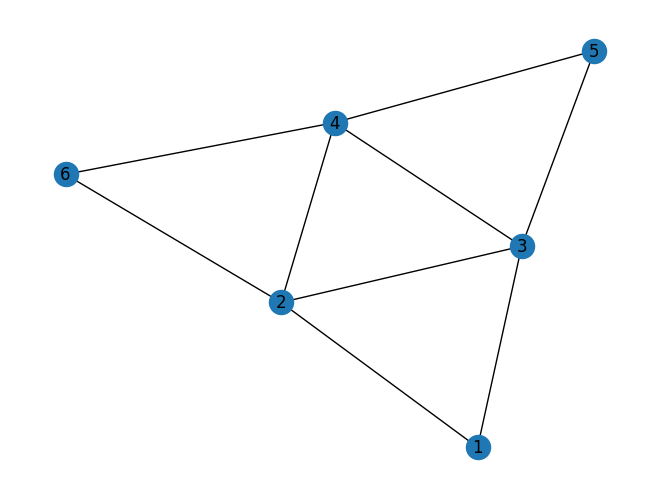

In [10]:
# Creamos el grafo correspondiente
graph = nx.Graph()
graph.add_nodes_from(list(str(i) for i in range(1,7)))
graph.add_edge("1","2")
graph.add_edge("1","3")
graph.add_edge("2","3")
graph.add_edge("2","4")
graph.add_edge("3","4")
graph.add_edge("3","5")
graph.add_edge("4","5")
graph.add_edge("2","6")
graph.add_edge("4","6")

# Lo dibujamos
display(nx.draw(graph,with_labels=True))

# Resolución sobre qpu
t_init=time.time()
sampler = EmbeddingComposite(DWaveSampler())
print(dnx.min_vertex_cover(graph, sampler))
print('Qsolver time=',time.time()-t_init)

# Resolución sobre un Computador Clásico
t_init=time.time()
sampler = ExactSolver()
print(dnx.min_vertex_cover(graph, sampler))
print('Exactsolver time=',time.time()-t_init)

